# Relative Age Effects in the NHL
**Fares Issa, Finnian Copp, Kaitlyn Richard, Brent Watling**

All data files found at https://github.com/faresissa/NHL-Data

In [251]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import csv
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import thinkplot
from thinkstats2 import Cdf
from thinkstats2 import RandomSeed
from collections import Counter

from matplotlib import rc
rc('animation', html='html5')

from thinkstats2 import RandomSeed
RandomSeed(17)

`getInjuryRate` uses a csv with all injuries from the 2016-2017 season to find an injury rate

`getDate` uses a csv with NHL player data to find their birth dates

`month_Rates` uses the list from `getData` to find the percentage of the players that were born in each month 

In [252]:
def getInjuryRate(fileName):
    total = 0
    with open(fileName, 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if(row[2] != 82): #if the player LTIRed then they shouldn't count for the rate
                total += int(row[2])
    csvfile.close()
    return total/(1271*20) #number of games in an nhl season is 1271 and 20 players per roster

injuryRate_201617 = getInjuryRate('NHL_Injury_Database_data.csv')

def getDate(fileName):
    #open the file such that we can read the content
    with open(fileName, 'rt') as csvfile:
        DOB = []
        reader = csv.reader(csvfile, delimiter=',')
        #for each row in the file
        #the row variable will be an array of strings that are 
        #seperated by a comma in the original file.
        for row in reader:
            
            #extract the year, month, games played and nationality
            #of each of the players
            year = (row[0])[0:4]
            month = int((row[0])[5:7])
            GP = int((row[16]))
            nationality = (row[4])
            if(nationality == "CAN"):
                nationality = 0
            elif(nationality == "USA"):
                nationality = 1
            elif(nationality == "FIN"):
                nationality = 2
            elif(nationality == "SWE"):
                nationality = 3
            elif(nationality == "RUS"):
                nationality = 4
            elif(nationality == "DNK"):
                nationality = 5
            elif(nationality == "CZE"):
                nationality = 6
            elif(nationality == "CHE"):
                nationality = 7
            elif(nationality == "SVK"):
                nationality = 8
            else:
                nationality = 9
            #combine all the data and append it to the DOB array
            birth = (year, month, GP, nationality)
            DOB.append(birth)
    #close the file and return the data
    csvfile.close()
    return DOB




def month_Rates(list):
    monthRates = np.zeros(12)
    total = 0
    for loc in list:
        monthRates[loc[1]-1] += 1
    
    return monthRates/sum(monthRates)

rates = month_Rates(getDate('NHL 2016-17 (1).csv'))


The following functions are designed to extract the data we have found online from the csv files they are stored in. Because the data is so specific, we had to write an algorithm to organize the data as we needed it. The functions both return an array of tuples, where the tuples hold the data of one player or country.

In [253]:
def getBirthRate(fileName):
    #open the file
    with open(fileName, 'rt') as csvfile:
        ROB = []

        reader = csv.reader(csvfile, delimiter=',')
        #loop through all the lines in the file
        for row in reader:
            #store the location, month and rate
            location = (row[0])
            month = (row[2])
            rate = (row[3])
            #append to the rate of birth array
            ROB.append((location, month, rate))
    
    #close the file
    csvfile.close()
    #return the data
    return ROB

Below is the code to generate and plot all of the statistical data found in the csv files included. All of the math done in this code is simple multiplication, division and addition to find averages and percentages.

The variable DOB holds the original data

`ageDist` variable holds the number of players born in each of the months.

`gpDist` stores the number of games played by players born in a month

`ageDistPercentage` is the percentage of the players born each month

`averageNationality` stores the percentage of players that are from each country.

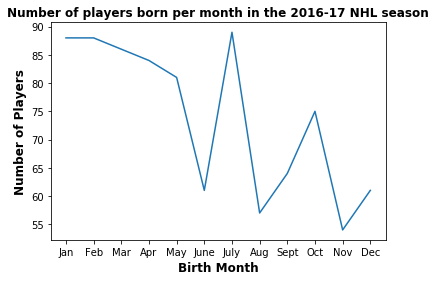

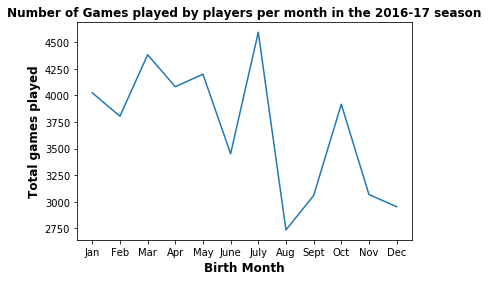

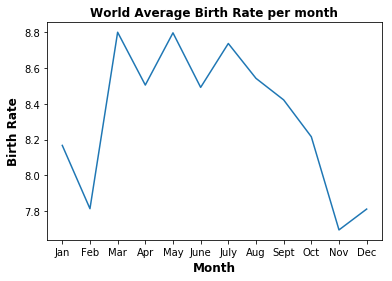

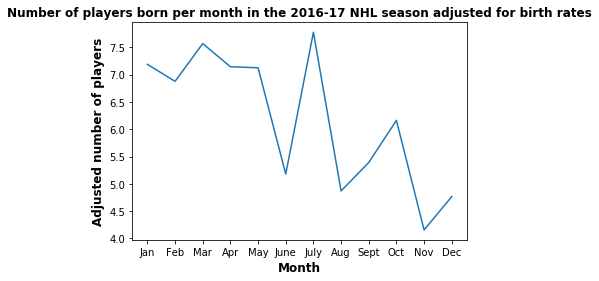

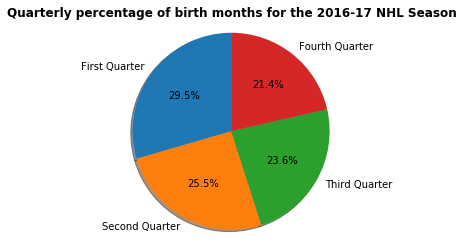

In [254]:
DOB = getDate('NHL 2016-17 (1).csv')

#use the data from the date of birth CSV file to determine the age distribution
ageDist = [0,0,0,0,0,0,0,0,0,0,0,0]
ageDist[4]
#use the data from the date of birth CSV file to determine the distribution of the total games played per month
gpDist = [0,0,0,0,0,0,0,0,0,0,0,0]

#loop through all the player arrays
for i in (DOB):
    #add one to the positiont of the age distribution array
    #based on the birth month of the current player in the DOB array
    ageDist[i[1] - 1] += 1
    #add the number of games played by the current player to the
    #position of the array that corresponds to the birth month
    gpDist[i[1]-1] += i[2]

#x axis for graphs
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

#get the birth rate of the countries included in the data csv file
#ROB is a list of tuples in the format (country, month, rate)
ROB = getBirthRate('UNDATA (1).csv')

#calculate the world birth rate by month
birthRatePerMonth = [0,0,0,0,0,0,0,0,0,0,0,0]

#counter
index = 0
#loop through all indexs of the birth rate data
for i in ROB:
    birthRatePerMonth[index%12] += float(i[2])
    index += 1
    
birthRatePerMonth = [x / (index /12) for x in birthRatePerMonth]

#plot the number of players in the 2016-17 season by month.
plt.figure(1)
plt.subplot(111)
plt.xlabel("Birth Month", weight='bold', size='large')
plt.ylabel("Number of Players", weight='bold', size='large')
plt.title("Number of players born per month in the 2016-17 NHL season", weight='bold', size='large')
plt.xticks(range(0,12), x)
plt.plot(ageDist)

#plot the number of games played by players based on birth months
plt.figure(2)
plt.subplot(111)
plt.xlabel("Birth Month", weight='bold', size='large')
plt.ylabel("Total games played", weight='bold', size='large')
plt.title("Number of Games played by players per month in the 2016-17 season", weight='bold', size='large')
plt.xticks(range(0,12), x)
plt.plot(gpDist)
plt.show()

#plot the average birth rate per month of the world
plt.figure(3)
plt.subplot(111)
plt.xlabel("Month", weight='bold', size='large')
plt.ylabel("Birth Rate", weight='bold', size='large')
plt.title("World Average Birth Rate per month", weight='bold', size='large')
plt.xticks(range(0,12), x)
plt.plot(birthRatePerMonth)
plt.show()

#multiply the number of players from each month by the percentage
#birth rate of each month
final = [0,0,0,0,0,0,0,0,0,0,0,0]
birthRatePerMonth = [x / (100) for x in birthRatePerMonth]
for i in range(12):
    final[i]= ageDist[i]*birthRatePerMonth[i]
    
#plot the data found above
plt.figure(4)
plt.subplot(111)
plt.xlabel("Month", weight='bold', size='large')
plt.ylabel("Adjusted number of players", weight='bold', size='large')
plt.title("Number of players born per month in the 2016-17 NHL season adjusted for birth rates", weight='bold', size='large')
plt.xticks(range(0,12), x)
plt.plot(final)
plt.show()

#calculate the percentage of players born in each month. Divide the number of players by the total number of players
ageDistPercent = [ageDist[x]*100/len(DOB) for x in range(len(ageDist))]

#create an array with the birth rate percentage for each quarter
quarters = [ageDistPercent[0] +ageDistPercent[1] +ageDistPercent[2], ageDistPercent[3] +ageDistPercent[4] +ageDistPercent[5],ageDistPercent[6] +ageDistPercent[7] +ageDistPercent[8],
           ageDistPercent[9] +ageDistPercent[10] +ageDistPercent[11]]

#pie chart labels
labels = 'First Quarter', 'Second Quarter', 'Third Quarter', 'Fourth Quarter'
#plot the pie chart for the birth rate percentage for each quarter
fig1, ax1 = plt.subplots()
ax1.pie(quarters, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Quarterly percentage of birth months for the 2016-17 NHL Season', weight='bold', size='large')

plt.show()

averageNationality = [0,0,0,0,0,0,0,0,0,0]

#sum the number of players from each nationality
for i in DOB:
    averageNationality[i[3]] += 1
    
#holds the percentage of the players who are born in each nationality
averageNationality = [x / len(DOB) for x in averageNationality]

# Predictive Model

`hockeyplayer` is the player class. Each player has a birthday, nationality, and injury rate. The injury rate defaults to using the data collected, but could be changed to simulate a more random world. The year defaults to 2000 because that is the current draft year. Nationality is included so the model could be expanded in the future.

In [255]:
class hockeyplayer():
    
    def __init__(self,month,nationality,injuryRate = injuryRate_201617,year=2000):
        
        self.nationality = nationality
        self.injuryRate = injuryRate
        self.month = month
        self.year = year
        self.rating = 0
        
test = hockeyplayer(2,2)
print(test.injuryRate)




0.3044846577498033


`model` is the class used to create our predictive model. The given amount of players is multiplied by 120 for 12 months for 10 potential nationalities.

`step` contains the algorithm to find the rating of each player. 

Rating, Number of Players at the Rating: [(0, 95522), (1, 19602), (2, 3894), (3, 795), (4, 161), (5, 24), (6, 2)]
NHLers: 187
Total Players: 120000
Percent of Players that made the NHL: 0.16%


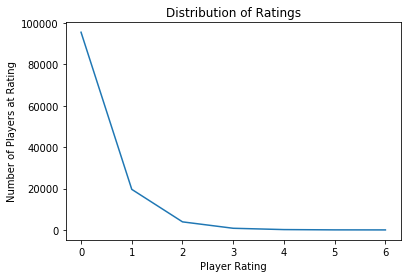

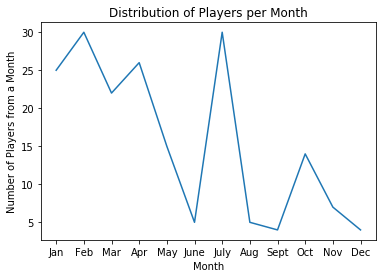

In [256]:
class model():
    
    def __init__(self,n,DOBdata):
        """
        DOBdata needs to be 12 long
        """
        num_players = n*120;
        self.players = []
        c = 0
        while c < num_players:
            for nat in range(10):
                for m in range(12):
                    self.players.append(hockeyplayer(m, nat)) #each nationality will have n players born in a month
                    c+=1
                    
        self.DOB_data = DOBdata
        
    def step(self):
        for player in self.players:
            
            injury = 0
            injury = -1 if np.random.random() < player.injuryRate else 0 #player loses point if they get injured
            dob = 0
            dob = 0 if np.random.random() >= self.DOB_data[player.month-1] else 1 #player gets a point if they have the month
            player.rating = player.rating + injury + dob
            
            if player.rating < 0:
                player.rating = 0
            
    def run_Sim(self):
        for i in range(18): #runs for 18 years
            self.step()
            
    def printRatings(self):
        for player in self.players:
            print(player.rating)
            
    def results(self):
        results = []
        for player in self.players:
            results.append(player.rating) #get all the ratings
        
        clist = Counter(results) #use Counter to find occurances of a rating
        
        total_players = 0
        values = []
        for rating, num_players in clist.items(): #make tuples for plotting
            values.append((rating,num_players))
            total_players += num_players
            
        values.sort(key=lambda tup: tup[0]) #sort the tuples
        print("Rating, Number of Players at the Rating: {}".format(values))
        
        nhlers = 0
        cut_off = np.percentile(results,99.9) #find the 99.9th percentile
        
        for i in values:
            if i[0] >= cut_off: #find number of players above that percentile
                nhlers += i[1]
        print("NHLers: {}\nTotal Players: {}\nPercent of Players that made the NHL: {:0.2f}%".format(nhlers,total_players,nhlers/total_players*100))
        
        plt.figure(1)
        plt.subplot(111)
        plt.plot(*zip(*values))
        plt.xlabel('Player Rating')
        plt.ylabel('Number of Players at Rating')
        plt.title('Distribution of Ratings')
        plt.savefig('distribution.jpg')
        plt.show()
        
        nhl = [player for player in self.players if player.rating >= cut_off] #find players that meet percentile
        distMonth = np.zeros(12)
        for player in nhl:
            distMonth[player.month-1] += 1
        
        x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
        plt.figure(2)
        plt.subplot(111)
        plt.xticks(range(0,12), x)
        plt.plot(distMonth)
        plt.xlabel('Month')
        plt.ylabel('Number of Players from a Month')
        plt.title('Distribution of Players per Month')
        plt.savefig('monthdistribution.jpg')
        plt.show()

 
            
test2 = model(1000,rates)
test2.run_Sim()
test2.results()